In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r'C:\Users\Siddhesh\Desktop\Bitcoin dataset.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,17-09-2014,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,18-09-2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,19-09-2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,20-09-2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,21-09-2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [3]:
df.shape

(2683, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000,2.683000e+03
mean,10989.900302,11286.625175,10662.957285,11003.581793,11003.581793,1.459304e+10
std,15902.616531,16331.949304,15408.069198,15908.160804,15908.160804,2.008458e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,601.778015,606.707001,596.048005,602.733490,602.733490,7.839140e+07
50%,6235.029785,6371.549805,6093.669922,6238.049805,6238.049805,4.999240e+09
75%,10316.638185,10495.605960,10067.539060,10317.936035,10317.936035,2.445092e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.509680e+11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2683 non-null   object 
 1   Open       2683 non-null   float64
 2   High       2683 non-null   float64
 3   Low        2683 non-null   float64
 4   Close      2683 non-null   float64
 5   Adj Close  2683 non-null   float64
 6   Volume     2683 non-null   float64
dtypes: float64(6), object(1)
memory usage: 146.9+ KB


--While performing the EDA of the Bitcoin Price data we will analyze how prices of the cryptocurrency have moved over the period of time and how the end of the quarters affects the prices of the currency.--

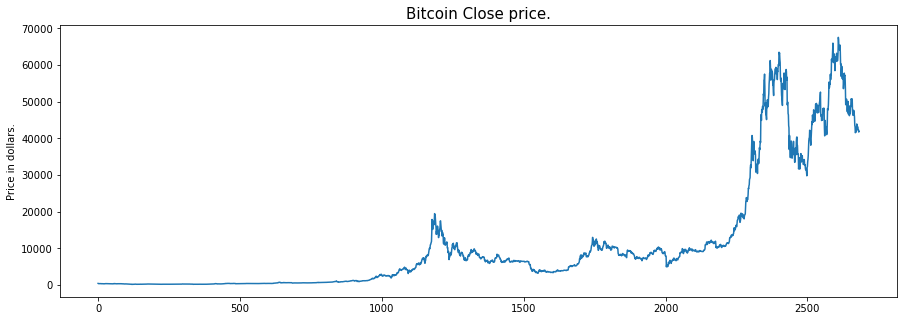

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [7]:
df[df['Close'] == df['Adj Close']].shape, df.shape

((2683, 7), (2683, 7))

From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data.So we drop Adj Close.

In [8]:
df = df.drop(['Adj Close'], axis=1)

In [13]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

This implies that there are no null values in the data set provided.

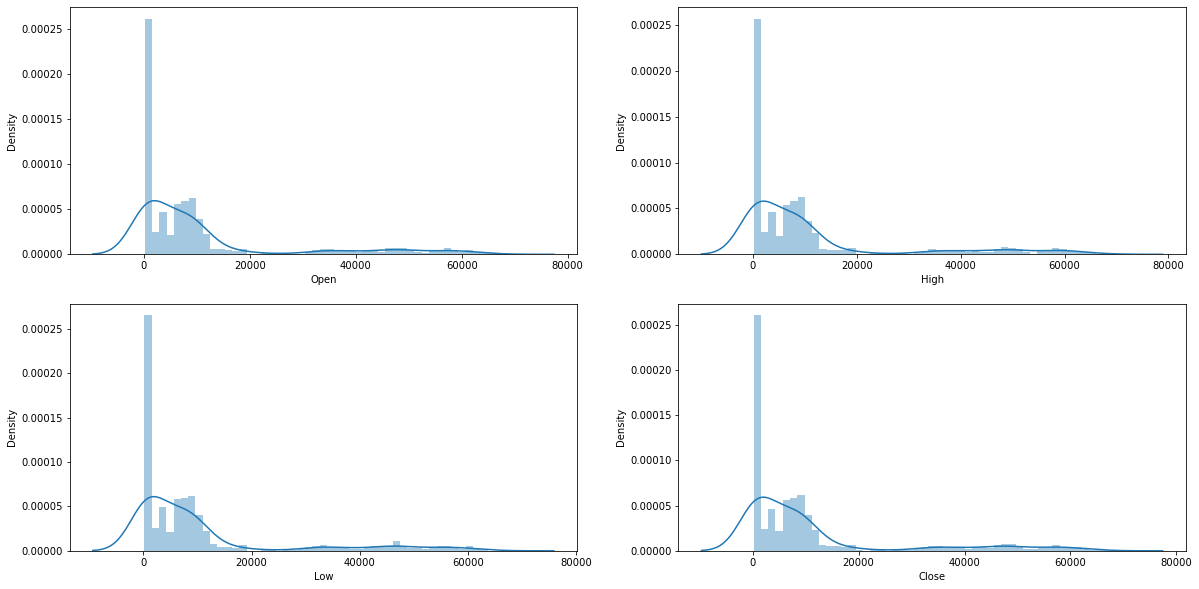

In [18]:
features = ['Open', 'High', 'Low', 'Close']
 
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df[col])
plt.show()

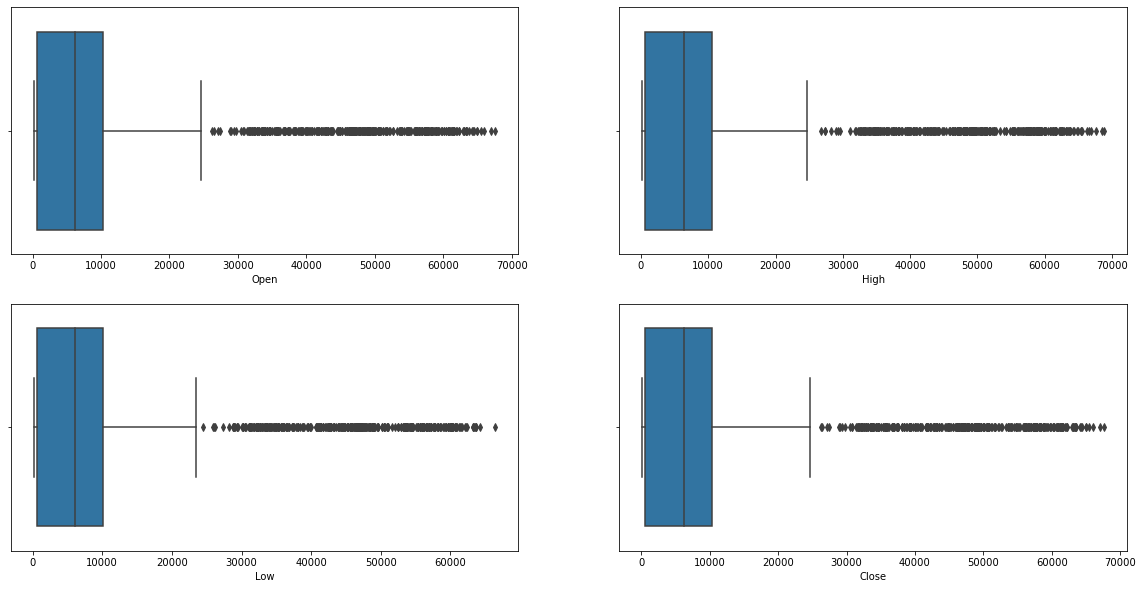

In [19]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.boxplot(df[col])
plt.show()

In [22]:
splitted = df['Date'].str.split('-', expand=True)
 
df['day'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[2].astype('int')
 
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,17-09-2014,465.864014,468.174011,452.421997,457.334015,21056800.0,2014,9,17
1,18-09-2014,456.859985,456.859985,413.104004,424.440002,34483200.0,2014,9,18
2,19-09-2014,424.102997,427.834991,384.532013,394.795990,37919700.0,2014,9,19
3,20-09-2014,394.673004,423.295990,389.882996,408.903992,36863600.0,2014,9,20
4,21-09-2014,408.084991,412.425995,393.181000,398.821014,26580100.0,2014,9,21


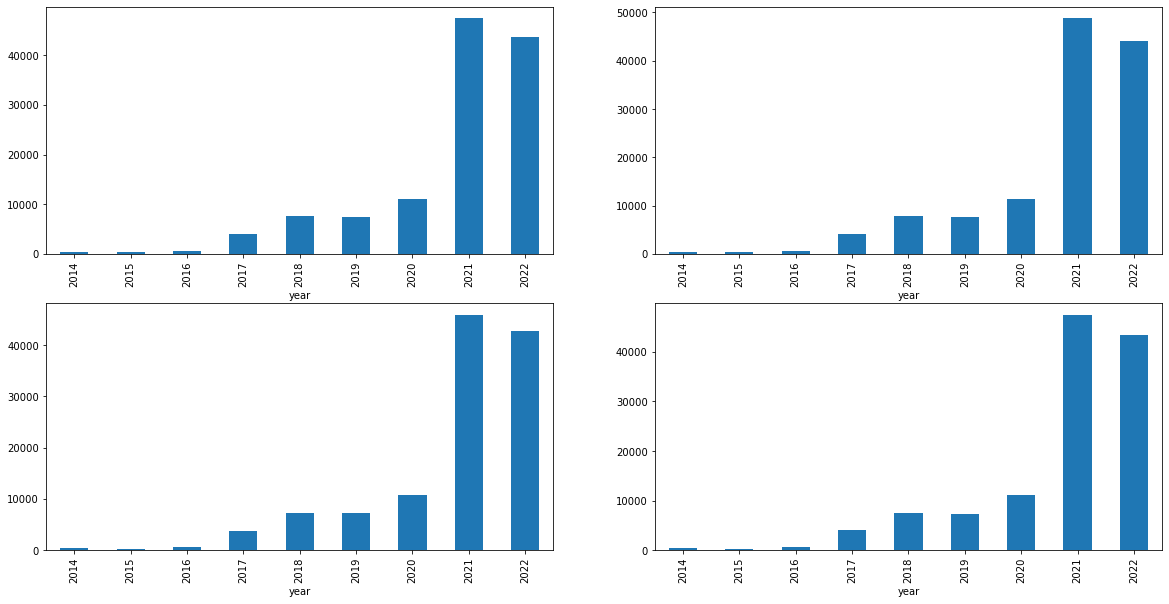

In [23]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

Here we can observe why there are so many outliers in the data as the prices of bitcoin have exploded in the year 2021.

In [30]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,17-09-2014,465.864014,468.174011,452.421997,457.334015,21056800.0,2014,9,17,1
1,18-09-2014,456.859985,456.859985,413.104004,424.440002,34483200.0,2014,9,18,1
2,19-09-2014,424.102997,427.834991,384.532013,394.795990,37919700.0,2014,9,19,1
3,20-09-2014,394.673004,423.295990,389.882996,408.903992,36863600.0,2014,9,20,1
4,21-09-2014,408.084991,412.425995,393.181000,398.821014,26580100.0,2014,9,21,1


In [31]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

df['open-close'] = df['Open'] - df['Close']: This line creates a new column in the DataFrame called 'open-close' and calculates the the difference between the 'Open' and 'Close' prices for each row.

df['low-high'] = df['Low'] - df['High']: Similarly, this line creates a new column called 'low-high' and calculates the difference between the 'Low' and 'High' prices for each row.

df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0): This line creates a new column called 'target'. It uses NumPy's where function to assign values to this column based on a condition. The condition is df['Close'].shift(-1) > df['Close'], which compares each day's closing price with the next day's closing price. If the closing price of the next day is greater than the current day, it assigns 1, otherwise 0.

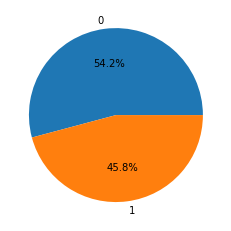

In [34]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

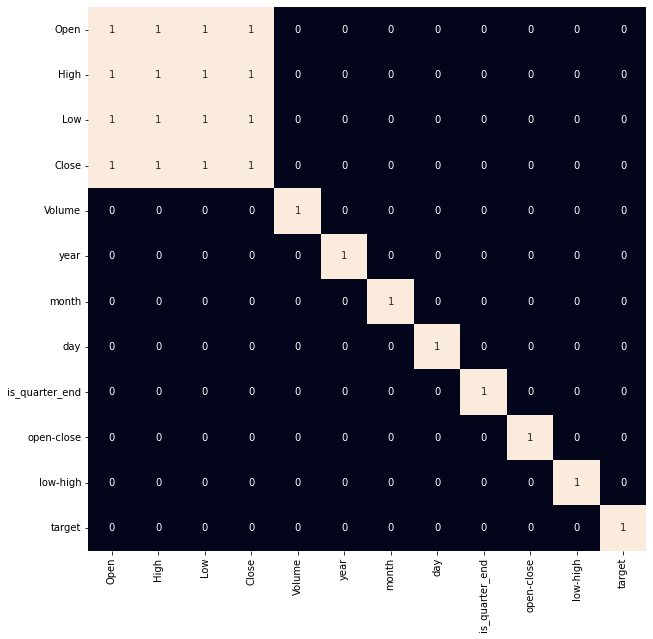

In [35]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

From the above heatmap, we can say that there is a high correlation between OHLC which is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

In [36]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.2, random_state=2022)
print(X_train.shape, X_valid.shape)

(2146, 3) (537, 3)


After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 80/20 ratio so, that we can evaluate the performance of our model on unseen data.

In [37]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5316731430507918
Validation Accuracy :  0.5141490857946553

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4685897553472748
Validation Accuracy :  0.47637130801687766

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training